# Obtain CH gene variants from MSK IMPACT


## DATA

### MSKCC DATA

Data corresponding to the MSKCC-IMPACT study (Clonal hematopoiesis mutations identified in blood samples from 24,146 patients whose tumor-blood pairs were analyzed using MSK-IMPACT.)

- Data obtained from: https://www.cbioportal.org/study/summary?id=msk_ch_2020


- Article: https://pubmed.ncbi.nlm.nih.gov/33106634/

### CH genes coordinates

Obtained from "/home/sdemajo/CH_gnomad_2021_02/results/CH_genes_exons_hg19.tsv", corresponding to **CH_genes_exons_hg19.ipynb** notebook



## ANALYSIS

1. Obtain and select MSKCC data


2. Explore MSKCC data: genes and number of CH mutations per gene


3. Transform MSKCC data to BedTool object using **pybedtools**


4. Obtain CH gene data and transform to BedTool object


5. Intersect analysis: get MSK gene variants from CH genes (**54 genes**)


6. Explore results: number of mutations per gene...


7. Obtain number of mutations per protein/nucleotide position within every gene

In [1]:
### Import libraries

import numpy as np
import pandas as pd
import pybedtools
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Open and show MSKCC data

# Show all the columns in the following data frame
pd.set_option('display.max_columns', 50)

# Open data frame
mskcc = pd.read_csv("/home/sdemajo/CH_MSKIMPACT_2021_03/msk_ch_2020/data_mutations_mskcc.txt",
                    sep="\t", skiprows=2)

# Show data frame
mskcc

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_File,Sequencer,t_ref_count,t_alt_count,n_ref_count,n_alt_count,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Hotspot,cbp_driver,cbp_driver_annotation
0,TNFRSF14,8764.0,NaN,GRCh37,1,2491283,2491283,+,missense_variant,Missense_Mutation,SNP,G,G,A,NaN,NaN,P-0014072-N01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000355716.4:c.326G>A,p.Arg109Gln,p.R109Q,ENST00000355716,NM_003820.2,109.0,cGg/cAg,0,Putative_Driver,CH putative non-driver
1,TNFRSF14,8764.0,NaN,GRCh37,1,2491316,2491316,+,missense_variant,Missense_Mutation,SNP,G,G,A,NaN,NaN,P-0006993-N01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000355716.4:c.359G>A,p.Gly120Asp,p.G120D,ENST00000355716,NM_003820.2,120.0,gGc/gAc,0,Putative_Driver,CH putative non-driver
2,TNFRSF14,8764.0,NaN,GRCh37,1,2491342,2491342,+,missense_variant,Missense_Mutation,SNP,G,G,T,NaN,NaN,P-0009531-N01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000355716.4:c.385G>T,p.Val129Phe,p.V129F,ENST00000355716,NM_003820.2,129.0,Gtc/Ttc,0,Putative_Driver,CH putative non-driver
3,TNFRSF14,8764.0,NaN,GRCh37,1,2492081,2492081,+,missense_variant,Missense_Mutation,SNP,C,C,A,NaN,NaN,P-0007305-N01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000355716.4:c.479C>A,p.Thr160Asn,p.T160N,ENST00000355716,NM_003820.2,160.0,aCc/aAc,0,Putative_Driver,CH putative non-driver
4,ERRFI1,54206.0,NaN,GRCh37,1,8073525,8073525,+,synonymous_variant,Silent,SNP,G,G,A,NaN,NaN,P-0016489-N01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000377482.5:c.1134C>T,p.Cys378=,p.C378=,ENST00000377482,NM_018948.3,378.0,tgC/tgT,0,Putative_Driver,CH putative non-driver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11071,STAG2,10735.0,NaN,GRCh37,X,123229279,123229279,+,missense_variant,Missense_Mutation,SNP,G,G,C,NaN,NaN,P-0026323-N01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000218089.9:c.3763G>C,p.Ala1255Pro,p.A1255P,ENST00000218089,NM_001042749.1,1255.0,Gct/Cct,0,Putative_Driver,CH putative non-driver
11072,SH2D1A,4068.0,NaN,GRCh37,X,123499609,123499609,+,splice_acceptor_variant,Splice_Site,SNP,A,A,G,NaN,NaN,P-0004342-N01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000371139.4:c.138-2A>G,NaN,p.X46_splice,ENST00000371139,NM_001114937.2,46.0,NaN,0,Putative_Driver,CH putative non-driver
11073,SH2D1A,4068.0,NaN,GRCh37,X,123504025,123504025,+,splice_acceptor_variant,Splice_Site,SNP,G,G,C,NaN,NaN,P-0012204-N01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000371139.4:c.202-1G>C,NaN,p.X68_splice,ENST00000371139,NM_001114937.2,68.0,NaN,0,Putative_Driver,CH putative non-driver
11074,SH2D1A,4068.0,NaN,GRCh37,X,123504056,123504056,+,missense_variant,Missense_Mutation,SNP,C,C,T,NaN,NaN,P-0024803-N01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENST00000371139.4:c.232C>T,p.Arg78Trp,p.R78W,ENST00000371139,NM_001114937.2,78.0,Cgg/Tgg,0,Putative_Driver,CH putative non-driver


In [3]:
# Show variable names
mskcc.columns

Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome',
       'Start_Position', 'End_Position', 'Strand', 'Consequence',
       'Variant_Classification', 'Variant_Type', 'Reference_Allele',
       'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS',
       'dbSNP_Val_Status', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 'Match_Norm_Seq_Allele1',
       'Match_Norm_Seq_Allele2', 'Tumor_Validation_Allele1',
       'Tumor_Validation_Allele2', 'Match_Norm_Validation_Allele1',
       'Match_Norm_Validation_Allele2', 'Verification_Status',
       'Validation_Status', 'Mutation_Status', 'Sequencing_Phase',
       'Sequence_Source', 'Validation_Method', 'Score', 'BAM_File',
       'Sequencer', 't_ref_count', 't_alt_count', 'n_ref_count', 'n_alt_count',
       'HGVSc', 'HGVSp', 'HGVSp_Short', 'Transcript_ID', 'RefSeq',
       'Protein_position', 'Codons', 'Hotspot', 'cbp_driver',
       'cbp_driver_annotation'],
      dtype='object')

In [4]:
### Reorder, select and modify columns

# Select columns
mskcc2 = mskcc[['Chromosome','Start_Position', 'End_Position', 'Strand', 
               'Hugo_Symbol', 'Entrez_Gene_Id', 'Consequence',
                'Variant_Classification', 'Variant_Type', 'Reference_Allele',
                'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2',
                'HGVSc', 'HGVSp', 'HGVSp_Short', 'Transcript_ID', 'RefSeq',
                'Protein_position', 'Codons', 'Hotspot', 'cbp_driver',
                'cbp_driver_annotation']]

# Change chromosome name (not necessary)
#mskcc2['Chromosome'] = 'chr' + mskcc2['Chromosome']
#mskcc2.loc[:, ('Chromosome')] = 'chr' + mskcc2.loc[:, ('Chromosome')]

# Show modified data frame
mskcc2

,Chromosome,Start_Position,End_Position,Strand,Hugo_Symbol,Entrez_Gene_Id,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Hotspot,cbp_driver,cbp_driver_annotation
0,1,2491283,2491283,+,TNFRSF14,8764.0,missense_variant,Missense_Mutation,SNP,G,G,A,ENST00000355716.4:c.326G>A,p.Arg109Gln,p.R109Q,ENST00000355716,NM_003820.2,109.0,cGg/cAg,0,Putative_Driver,CH putative non-driver
1,1,2491316,2491316,+,TNFRSF14,8764.0,missense_variant,Missense_Mutation,SNP,G,G,A,ENST00000355716.4:c.359G>A,p.Gly120Asp,p.G120D,ENST00000355716,NM_003820.2,120.0,gGc/gAc,0,Putative_Driver,CH putative non-driver
2,1,2491342,2491342,+,TNFRSF14,8764.0,missense_variant,Missense_Mutation,SNP,G,G,T,ENST00000355716.4:c.385G>T,p.Val129Phe,p.V129F,ENST00000355716,NM_003820.2,129.0,Gtc/Ttc,0,Putative_Driver,CH putative non-driver
3,1,2492081,2492081,+,TNFRSF14,8764.0,missense_variant,Missense_Mutation,SNP,C,C,A,ENST00000355716.4:c.479C>A,p.Thr160Asn,p.T160N,ENST00000355716,NM_003820.2,160.0,aCc/aAc,0,Putative_Driver,CH putative non-driver
4,1,8073525,8073525,+,ERRFI1,54206.0,synonymous_variant,Silent,SNP,G,G,A,ENST00000377482.5:c.1134C>T,p.Cys378=,p.C378=,ENST00000377482,NM_018948.3,378.0,tgC/tgT,0,Putative_Driver,CH putative non-driver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11071,X,123229279,123229279,+,STAG2,10735.0,missense_variant,Missense_Mutation,SNP,G,G,C,ENST00000218089.9:c.3763G>C,p.Ala1255Pro,p.A1255P,ENST00000218089,NM_001042749.1,1255.0,Gct/Cct,0,Putative_Driver,CH putative non-driver
11072,X,123499609,123499609,+,SH2D1A,4068.0,splice_acceptor_variant,Splice_Site,SNP,A,A,G,ENST00000371139.4:c.138-2A>G,NaN,p.X46_splice,ENST00000371139,NM_001114937.2,46.0,NaN,0,Putative_Driver,CH putative non-driver
11073,X,123504025,123504025,+,SH2D1A,4068.0,splice_acceptor_variant,Splice_Site,SNP,G,G,C,ENST00000371139.4:c.202-1G>C,NaN,p.X68_splice,ENST00000371139,NM_001114937.2,68.0,NaN,0,Putative_Driver,CH putative non-driver
11074,X,123504056,123504056,+,SH2D1A,4068.0,missense_variant,Missense_Mutation,SNP,C,C,T,ENST00000371139.4:c.232C>T,p.Arg78Trp,p.R78W,ENST00000371139,NM_001114937.2,78.0,Cgg/Tgg,0,Putative_Driver,CH putative non-driver


In [5]:
### Check chromosome names and length

print(mskcc2['Chromosome'].value_counts())
print()
print(len(mskcc2['Chromosome'].value_counts()))

2     3285
17    1427
4     1092
20     506
19     416
12     415
11     402
16     384
1      353
X      346
3      336
6      296
7      290
9      286
22     269
5      258
15     163
13     139
8      137
10     112
21      74
14      58
18      32
Name: Chromosome, dtype: int64

23


In [6]:
### Number of mutations in different positions (example in chr1)
print(len(mskcc2.loc[mskcc2['Chromosome'] == "1", 'Start_Position']))
print(len(mskcc2.loc[mskcc2['Chromosome'] == "1", 'Start_Position'].unique()))

353
325


DNMT3A      2890
TET2         835
PPM1D        702
ASXL1        312
TP53         276
            ... 
CDKN1A         1
SDHC           1
CDKN2B         1
HIST2H3D       1
SESN3          1
Name: Hugo_Symbol, Length: 448, dtype: int64


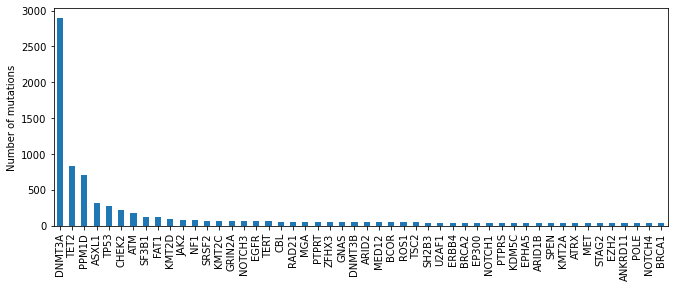

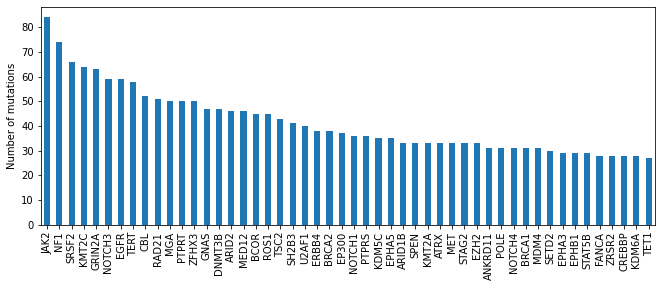

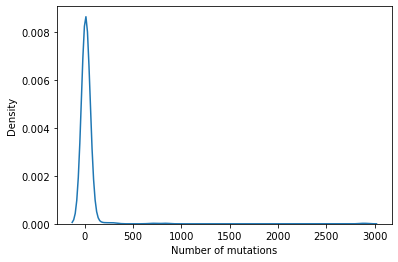

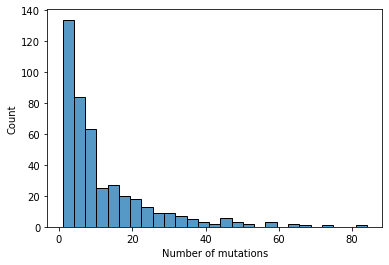

In [7]:
### Study mutations per genes

# Number of mutations per gene
print(mskcc2["Hugo_Symbol"].value_counts())

# Bar plot number of mutations per gene (top 50 genes)
graph = mskcc2["Hugo_Symbol"].value_counts().head(50).plot.bar(figsize=(11,4))
graph.set_ylabel("Number of mutations")
plt.show()

# Bar plot number of mutations per gene (excluding top 10 genes, from 10 to 60)
graph = mskcc2["Hugo_Symbol"].value_counts()[10:].head(50).plot.bar(figsize=(11,4))
graph.set_ylabel("Number of mutations")
plt.show()

# Density plot number of mutations
graph = sns.kdeplot(mskcc2["Hugo_Symbol"].value_counts())
graph.set(xlabel="Number of mutations")
plt.show()

# Histogram number of mutations (excluding top 10 mutated genes)
graph = sns.histplot(mskcc2["Hugo_Symbol"].value_counts()[10:])
graph.set(xlabel="Number of mutations")
plt.show()

In [8]:
### Transform to BedTool object
# Using pybedtools

mskcc_bed = pybedtools.BedTool.from_dataframe(mskcc2)
mskcc_bed.head()

1	2491283	2491283	+	TNFRSF14	8764.0	missense_variant	Missense_Mutation	SNP	G	G	A	ENST00000355716.4:c.326G>A	p.Arg109Gln	p.R109Q	ENST00000355716	NM_003820.2	109.0	cGg/cAg	0	Putative_Driver	CH putative non-driver
 1	2491316	2491316	+	TNFRSF14	8764.0	missense_variant	Missense_Mutation	SNP	G	G	A	ENST00000355716.4:c.359G>A	p.Gly120Asp	p.G120D	ENST00000355716	NM_003820.2	120.0	gGc/gAc	0	Putative_Driver	CH putative non-driver
 1	2491342	2491342	+	TNFRSF14	8764.0	missense_variant	Missense_Mutation	SNP	G	G	T	ENST00000355716.4:c.385G>T	p.Val129Phe	p.V129F	ENST00000355716	NM_003820.2	129.0	Gtc/Ttc	0	Putative_Driver	CH putative non-driver
 1	2492081	2492081	+	TNFRSF14	8764.0	missense_variant	Missense_Mutation	SNP	C	C	A	ENST00000355716.4:c.479C>A	p.Thr160Asn	p.T160N	ENST00000355716	NM_003820.2	160.0	aCc/aAc	0	Putative_Driver	CH putative non-driver
 1	8073525	8073525	+	ERRFI1	54206.0	synonymous_variant	Silent	SNP	G	G	A	ENST00000377482.5:c.1134C>T	p.Cys378=	p.C378=	ENST00000377482	NM_018948.3	378.0	t

In [9]:
### Obtain CH gene exon data

ch_exons19 = pd.read_csv("/home/sdemajo/CH_gnomad_2021_02/results/CH_genes_exons_hg19.tsv",
                         sep="\t", index_col=0)
ch_exons19

,CHROMOSOME,START,END,STRAND,GENE_ID,TRANSCRIPT_ID,SYMBOL
433,1,1718770,1718876,-,ENSG00000078369,ENST00000378609,GNB1
434,1,1720492,1720708,-,ENSG00000078369,ENST00000378609,GNB1
435,1,1721834,1722035,-,ENSG00000078369,ENST00000378609,GNB1
436,1,1724684,1724750,-,ENSG00000078369,ENST00000378609,GNB1
437,1,1735858,1736020,-,ENSG00000078369,ENST00000378609,GNB1
...,...,...,...,...,...,...,...
190020,X,123224425,123224614,+,ENSG00000101972,ENST00000371145,STAG2
190021,X,123224704,123224814,+,ENSG00000101972,ENST00000371145,STAG2
190022,X,123227868,123227994,+,ENSG00000101972,ENST00000371145,STAG2
190023,X,123229222,123229299,+,ENSG00000101972,ENST00000371145,STAG2


In [10]:
## Transform to BedTool object

ch_exons_bed = pybedtools.BedTool.from_dataframe(ch_exons19)
ch_exons_bed.head()

1	1718770	1718876	-	ENSG00000078369	ENST00000378609	GNB1
 1	1720492	1720708	-	ENSG00000078369	ENST00000378609	GNB1
 1	1721834	1722035	-	ENSG00000078369	ENST00000378609	GNB1
 1	1724684	1724750	-	ENSG00000078369	ENST00000378609	GNB1
 1	1735858	1736020	-	ENSG00000078369	ENST00000378609	GNB1
 1	1737914	1737977	-	ENSG00000078369	ENST00000378609	GNB1
 1	1747195	1747301	-	ENSG00000078369	ENST00000378609	GNB1
 1	1749276	1749314	-	ENSG00000078369	ENST00000378609	GNB1
 1	1756836	1756892	-	ENSG00000078369	ENST00000378609	GNB1
 1	43803520	43803598	+	ENSG00000117400	ENST00000372470	MPL
 

In [11]:
### INTERSECT DATA

# Intersent using "u=True" to obtain all rows in mskcc_bed that overlap with ch_exons_bed
mskcc_chgenes = mskcc_bed.intersect(ch_exons_bed, u=True)

# Show results
mskcc_chgenes.head()


1	43805059	43805059	+	MPL	4352.0	missense_variant	Missense_Mutation	SNP	G	G	A	ENST00000372470.3:c.509G>A	p.Arg170His	p.R170H	ENST00000372470	NM_005373.2	170.0	cGc/cAc	0	Putative_Driver	CH putative non-driver
 1	43805161	43805161	+	MPL	4352.0	missense_variant	Missense_Mutation	SNP	C	C	T	ENST00000372470.3:c.611C>T	p.Ser204Phe	p.S204F	ENST00000372470	NM_005373.2	204.0	tCt/tTt	0	Putative_Driver	CH putative driver
 1	43812161	43812161	+	MPL	4352.0	synonymous_variant	Silent	SNP	A	A	T	ENST00000372470.3:c.1026A>T	p.Pro342=	p.P342=	ENST00000372470	NM_005373.2	342.0	ccA/ccT	0	Putative_Driver	CH putative non-driver
 1	43812539	43812539	+	MPL	4352.0	synonymous_variant	Silent	SNP	G	G	A	ENST00000372470.3:c.1242G>A	p.Ser414=	p.S414=	ENST00000372470	NM_005373.2	414.0	tcG/tcA	0	Putative_Driver	CH putative non-driver
 1	43812566	43812566	+	MPL	4352.0	synonymous_variant	Silent	SNP	T	T	C	ENST00000372470.3:c.1269T>C	p.Tyr423=	p.Y423=	ENST00000372470	NM_005373.2	423.0	taT/taC	0	Putative_Driver	CH putative n

/home/sdemajo/miniconda3/envs/clonalh/lib/python3.8/subprocess.py:849: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


In [12]:
## Explore results

# First register
print(mskcc_chgenes[0])

# Type of object obtained
print(type(mskcc_chgenes))

# Number of mutations obtained
print(len(mskcc_chgenes))

# Show first interval
mskcc_chgenes[0]

1	43805059	43805059	+	MPL	4352.0	missense_variant	Missense_Mutation	SNP	G	G	A	ENST00000372470.3:c.509G>A	p.Arg170His	p.R170H	ENST00000372470	NM_005373.2	170.0	cGc/cAc	0	Putative_Driver	CH putative non-driver

<class 'pybedtools.bedtool.BedTool'>
6457


Interval(1:43805059-43805059)

In [13]:
### Transform to pandas data frame

# Transform to data frame
mskcc_chgenes_df = mskcc_chgenes.to_dataframe(header=None)

# Change column names
mskcc_chgenes_df.columns = ['Chromosome','Start_Position', 'End_Position', 'Strand', 
               'Hugo_Symbol', 'Entrez_Gene_Id', 'Consequence',
                'Variant_Classification', 'Variant_Type', 'Reference_Allele',
                'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2',
                'HGVSc', 'HGVSp', 'HGVSp_Short', 'Transcript_ID', 'RefSeq',
                'Protein_position', 'Codons', 'Hotspot', 'cbp_driver',
                'cbp_driver_annotation']

# Show
mskcc_chgenes_df

/home/sdemajo/miniconda3/envs/clonalh/lib/python3.8/site-packages/pybedtools/bedtool.py:3678: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 22 fields; you can supply custom names with the `names` kwarg
  warn(


,Chromosome,Start_Position,End_Position,Strand,Hugo_Symbol,Entrez_Gene_Id,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Hotspot,cbp_driver,cbp_driver_annotation
0,1,43805059,43805059,+,MPL,4352.0,missense_variant,Missense_Mutation,SNP,G,G,A,ENST00000372470.3:c.509G>A,p.Arg170His,p.R170H,ENST00000372470,NM_005373.2,170.0,cGc/cAc,0,Putative_Driver,CH putative non-driver
1,1,43805161,43805161,+,MPL,4352.0,missense_variant,Missense_Mutation,SNP,C,C,T,ENST00000372470.3:c.611C>T,p.Ser204Phe,p.S204F,ENST00000372470,NM_005373.2,204.0,tCt/tTt,0,Putative_Driver,CH putative driver
2,1,43812161,43812161,+,MPL,4352.0,synonymous_variant,Silent,SNP,A,A,T,ENST00000372470.3:c.1026A>T,p.Pro342=,p.P342=,ENST00000372470,NM_005373.2,342.0,ccA/ccT,0,Putative_Driver,CH putative non-driver
3,1,43812539,43812539,+,MPL,4352.0,synonymous_variant,Silent,SNP,G,G,A,ENST00000372470.3:c.1242G>A,p.Ser414=,p.S414=,ENST00000372470,NM_005373.2,414.0,tcG/tcA,0,Putative_Driver,CH putative non-driver
4,1,43812566,43812566,+,MPL,4352.0,synonymous_variant,Silent,SNP,T,T,C,ENST00000372470.3:c.1269T>C,p.Tyr423=,p.Y423=,ENST00000372470,NM_005373.2,423.0,taT/taC,0,Putative_Driver,CH putative non-driver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6452,X,123220549,123220549,+,STAG2,10735.0,missense_variant,Missense_Mutation,SNP,C,C,G,ENST00000218089.9:c.3206C>G,p.Thr1069Arg,p.T1069R,ENST00000218089,NM_001042749.1,1069.0,aCa/aGa,0,Putative_Driver,CH putative non-driver
6453,X,123220567,123220567,+,STAG2,10735.0,frameshift_variant,Frame_Shift_Del,DEL,C,C,-,ENST00000218089.9:c.3224del,p.Ser1075Ter,p.S1075*,ENST00000218089,NM_001042749.1,1075.0,tCa/ta,0,Putative_Driver,CH putative driver
6454,X,123224456,123224456,+,STAG2,10735.0,stop_gained,Nonsense_Mutation,SNP,G,G,A,ENST00000218089.9:c.3309G>A,p.Trp1103Ter,p.W1103*,ENST00000218089,NM_001042749.1,1103.0,tgG/tgA,0,Putative_Driver,CH putative driver
6455,X,123229240,123229240,+,STAG2,10735.0,stop_gained,Nonsense_Mutation,SNP,C,C,T,ENST00000218089.9:c.3724C>T,p.Arg1242Ter,p.R1242*,ENST00000218089,NM_001042749.1,1242.0,Cga/Tga,0,Putative_Driver,CH putative driver


In [14]:
### Save

mskcc_chgenes_df.to_csv("/home/sdemajo/CH_MSKIMPACT_2021_03/results/MSKCC_chmutations.tsv",
                        sep="\t", index=False)

In [15]:
### Get genes obtained and corresponding number of mutations

# Number of genes
print(len(mskcc_chgenes_df["Hugo_Symbol"].unique()))

# Number of mutations per gene
mskcc_chgenes_df["Hugo_Symbol"].value_counts()

54


DNMT3A    2585
TET2       810
PPM1D      702
ASXL1      306
TP53       263
CHEK2      195
ATM        162
SF3B1      121
KMT2D       90
JAK2        84
SRSF2       66
NF1         65
KMT2C       64
CBL         50
GNAS        47
MGA         46
ARID2       44
RAD21       42
U2AF1       40
SH2B3       40
DNMT3B      39
NOTCH1      36
KDM5C       35
MDM4        31
STAG2       30
EZH2        30
EPHA3       29
STAT5B      29
IDH2        27
ZRSR2       26
KDM6A       25
PTPRD       23
CTCF        23
KRAS        21
TP63        20
MYCN        20
APC         18
STAT3       18
RET         17
AR          16
MPL         15
RUNX1       13
PTPN11      12
MYD88       11
ERCC2       10
SUZ12       10
FOXP1       10
CALR         9
IDH1         8
NRAS         8
ERF          6
PPARG        5
CDKN1B       4
SDHAF2       1
Name: Hugo_Symbol, dtype: int64

Text(0, 0.5, 'Number of mutations')

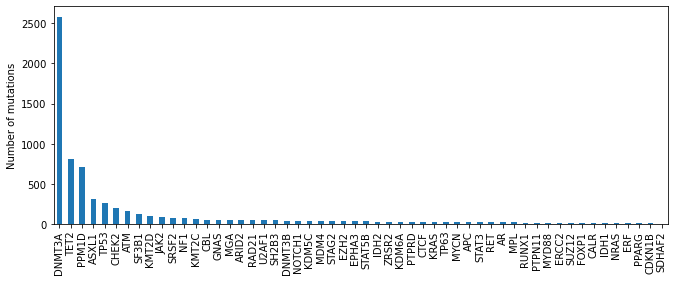

In [16]:
# Bar plot number of mutations per gene

graph = mskcc_chgenes_df["Hugo_Symbol"].value_counts().plot.bar(figsize=(11,4))
graph.set_ylabel("Number of mutations")

In [17]:
### Get type of mutations

print(mskcc_chgenes_df["Variant_Classification"].value_counts())
print()
print(mskcc_chgenes_df["Consequence"].value_counts())

Missense_Mutation         3481
Nonsense_Mutation         1238
Frame_Shift_Del           1080
Frame_Shift_Ins            401
Silent                     171
In_Frame_Del                53
Splice_Site                 18
In_Frame_Ins                10
Translation_Start_Site       3
Nonstop_Mutation             2
Name: Variant_Classification, dtype: int64

missense_variant                                                  3380
frameshift_variant                                                1458
stop_gained                                                       1194
synonymous_variant                                                 171
missense_variant,splice_region_variant                             101
inframe_deletion                                                    52
frameshift_variant,splice_region_variant                            23
stop_gained,splice_region_variant                                   22
stop_gained,frameshift_variant                                      19
inframe

In [18]:
### Group by gene and NUCLEOTIDE position

# Option 1: pivot table
mskcc_chgenes_df.pivot_table(index=["Hugo_Symbol", "Protein_position", "Chromosome", "Start_Position"],
                             aggfunc='size').reset_index().head(50)

# Option 2: groupby
mskcc_ch_ntmut = mskcc_chgenes_df.groupby(["Hugo_Symbol", "Protein_position", "Chromosome", "Start_Position"],
                                          as_index=False).size()

# transform protein position to integer
mskcc_ch_ntmut["Protein_position"] = mskcc_ch_ntmut["Protein_position"].astype(int)

# Change colname
mskcc_ch_ntmut = mskcc_ch_ntmut.rename(columns = {'size':'Number_mutations'})

# Show
mskcc_ch_ntmut

,Hugo_Symbol,Protein_position,Chromosome,Start_Position,Number_mutations
0,APC,94,5,112102945,1
1,APC,103,5,112102974,1
2,APC,196,5,112116541,1
3,APC,304,5,112151269,1
4,APC,640,5,112170823,1
...,...,...,...,...,...
3223,ZRSR2,400,X,15841116,1
3224,ZRSR2,417,X,15841166,1
3225,ZRSR2,432,X,15841194,1
3226,ZRSR2,440,X,15841235,1


In [19]:
# Option 3: value counts

mskcc_chgenes_df[["Hugo_Symbol", "Protein_position", "Chromosome", "Start_Position"]].value_counts()


Hugo_Symbol  Protein_position  Chromosome  Start_Position
DNMT3A       882.0             2           25457242          150
                                           25457243           89
JAK2         617.0             9           5073770            74
PPM1D        552.0             17          58740749           59
SRSF2        95.0              17          74732959           46
                                                            ... 
NOTCH1       668.0             9           139409752           1
             128.0             9           139418189           1
             105.0             9           139418259           1
             62.0              9           139418386           1
APC          94.0              5           112102945           1
Length: 3228, dtype: int64

In [20]:
### Group by gene and PROTEIN position

# Some mutations in different nucleotide are shown together

# Option 1: pivot table
mskcc_chgenes_df.pivot_table(index=["Hugo_Symbol", "Protein_position"], aggfunc='size').reset_index().tail(30)

# Option 2: group by
mskcc_ch_protmut = mskcc_chgenes_df.groupby(["Hugo_Symbol", "Protein_position"], as_index=False).size()

# transform protein position to integer
mskcc_ch_protmut["Protein_position"] = mskcc_ch_protmut["Protein_position"].astype(int)

# Change colname
mskcc_ch_protmut = mskcc_ch_protmut.rename(columns = {'size':'Number_mutations'})

# show
mskcc_ch_protmut

,Hugo_Symbol,Protein_position,Number_mutations
0,APC,94,1
1,APC,103,1
2,APC,196,1
3,APC,304,1
4,APC,640,1
...,...,...,...
2613,ZRSR2,400,1
2614,ZRSR2,417,1
2615,ZRSR2,432,1
2616,ZRSR2,440,1


In [21]:
# Option 3: value counts

mskcc_chgenes_df[["Hugo_Symbol", "Protein_position"]].value_counts()

Hugo_Symbol  Protein_position
DNMT3A       882.0               239
JAK2         617.0                74
DNMT3A       635.0                67
             736.0                66
PPM1D        552.0                59
                                ... 
NOTCH1       128.0                 1
             668.0                 1
             725.0                 1
             812.0                 1
APC          94.0                  1
Length: 2618, dtype: int64

In [33]:
### Check positions with more mutations

mskcc_ch_protmut.sort_values("Number_mutations", ascending=False).head(10)

,Hugo_Symbol,Protein_position,Number_mutations
1013,DNMT3A,882,239
1176,JAK2,617,74
810,DNMT3A,635,67
899,DNMT3A,736,66
1694,PPM1D,552,59
930,DNMT3A,771,49
1890,SRSF2,95,47
898,DNMT3A,735,46
1029,DNMT3A,904,45
1824,SF3B1,700,41


In [31]:
df = mskcc_ch_protmut.sort_values("Number_mutations", ascending=False)
df.columns = ['CH driver gene','Protein position','Number mutations']
df.head(10).style.set_properties(**{'text-align':'center'})

,CH driver gene,Protein position,Number mutations
1013,DNMT3A,882,239
1176,JAK2,617,74
810,DNMT3A,635,67
899,DNMT3A,736,66
1694,PPM1D,552,59
930,DNMT3A,771,49
1890,SRSF2,95,47
898,DNMT3A,735,46
1029,DNMT3A,904,45
1824,SF3B1,700,41


In [39]:
# Add UKB data
df = mskcc_ch_protmut.sort_values("Number_mutations", ascending=False).head(5)
df['UKB mutations'] = [104, 50, 14, 17, 4]
df.columns = ['CH driver gene','Protein position','MSKCC mutations', 'UKB mutations']
df.style.set_properties(**{'text-align':'center'})

,CH driver gene,Protein position,MSKCC mutations,UKB mutations
1013,DNMT3A,882,239,104
1176,JAK2,617,74,50
810,DNMT3A,635,67,14
899,DNMT3A,736,66,17
1694,PPM1D,552,59,4


In [23]:
### SAVE RESULTS

mskcc_ch_protmut.to_csv("/home/sdemajo/CH_MSKIMPACT_2021_03/results/MSKCC_chmutations_prot.tsv", sep="\t")

mskcc_ch_ntmut.to_csv("/home/sdemajo/CH_MSKIMPACT_2021_03/results/MSKCC_chmutations_nt.tsv", sep="\t")
